# Plot maps of the original CESM2 data as well as the regridded data (done using regrid_CESM2_seaice_to_1x1.ipynb)

---

## Load necessary packages

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## Read in regridded data

In [2]:
# Regridded data
direc_rg = '/Users/pade7652/Google Drive/CUBoulder/Projects/Summer2021_Patricia/Data/'
ds_rg    = xr.open_dataset(direc_rg+'CESM2_siconc_hist_r1i1p1f1_xesmf_rg_1x1.nc')
print(ds_rg)
sic_rg   = ds_rg['siconc']

<xarray.Dataset>
Dimensions:    (d2: 2, ni: 320, nj: 384, nvertices: 4, time: 1980)
Coordinates:
    lat        (nj, ni) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lon        (nj, ni) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * ni         (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj         (nj) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: d2, nvertices
Data variables:
    siconc     (time, nj, ni) float32 dask.array<chunksize=(1980, 384, 320), meta=np.ndarray>
    time_bnds  (time, d2) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat_bnds   (nj, ni, nvertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
    lon_bnds   (nj, ni, nvertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity

/Users/pade7652/opt/anaconda3/envs/regrid_env/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/pade7652/opt/anaconda3/envs/regrid_env/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'siconc' has multiple fill values {1.0000000200408773e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


## Create a function to make the plot axes circular (normally they are square) for polar stereographic plots

In [3]:
# Takes as an argument the axis set up to make the plot 
def make_ax_circular(axis):
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    axis.set_boundary(circle, transform=axis.transAxes)

## Plot Northern Hemisphere regridded sea ice concentration

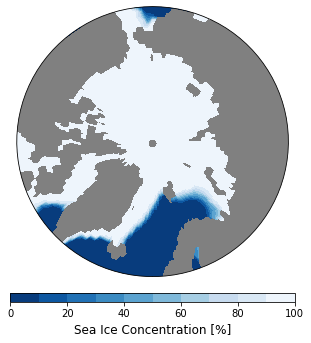

In [14]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(1,1,1,projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
make_ax_circular(axis = ax)
cs = ax.contourf(ds_rg.coords['lon'],ds_rg.coords['lat'],sic_rg[0],levels=np.arange(0,110,10),transform=ccrs.PlateCarree(),cmap=plt.cm.Blues_r)
ax.set_facecolor('0.5') # Fill in model land by making the axis background whatever color you want
plt.subplots_adjust(left=0.1,top=0.9,bottom=0.15)
#Colorbar
cax = fig.add_axes([0.105, 0.08, 0.79, 0.025]) #x,y,w,h
cbar = plt.colorbar(cs,cax=cax,orientation='horizontal')
cbar.set_label('Sea Ice Concentration [%]',fontsize=12)

## Plot Southern Hemisphere regridded sea ice concentration

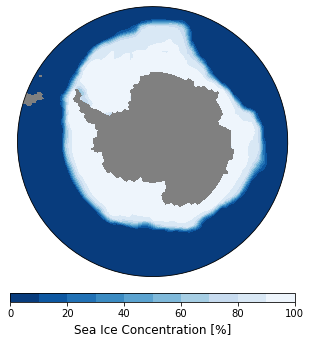

In [16]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
make_ax_circular(axis = ax)
cs = ax.contourf(ds_rg.coords['lon'],ds_rg.coords['lat'],sic_rg[8],levels=np.arange(0,110,10),transform=ccrs.PlateCarree(),cmap=plt.cm.Blues_r)
ax.set_facecolor('0.5') # Fill in model land by making the axis background whatever color you want
plt.subplots_adjust(left=0.1,top=0.9,bottom=0.15)
#Colorbar
cax = fig.add_axes([0.105, 0.08, 0.79, 0.025]) #x,y,w,h
cbar = plt.colorbar(cs,cax=cax,orientation='horizontal')
cbar.set_label('Sea Ice Concentration [%]',fontsize=12)